<a href="https://colab.research.google.com/github/manyamutyala/weather_prediction/blob/main/weather_analysis_and_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np # linear algebra
import pandas as pd 

* First, we import the libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

* I define here some functions for better visualization of the posterior plots.

In [3]:
def resizeplot():
    plt.figure(figsize=(12,6))

In [4]:
def resizecorr():
    plt.figure(figsize=(15,7))

#This function it is for correlations plots

*  Load the data:

In [5]:
df = pd.read_csv('/content/weather.csv')

In [6]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


* Let's see if there are missing data.

In [7]:
df.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

* We have some missing data. We will visualize them better in the graph.

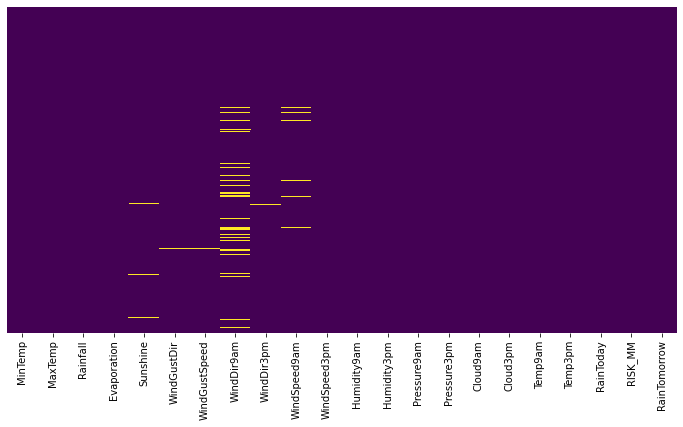

In [8]:
resizeplot()
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

* There are several ways to treat missing data. Each with its own strengths and weaknesses. A common strategy is to fill the data with the averages but it is usually not as close to the real value as if we used KNN, it is a good solution for small datasets.

In [9]:
from sklearn.impute import KNNImputer

In [10]:
from sklearn.impute import SimpleImputer

In [11]:
imputer_int = KNNImputer(missing_values=np.nan)

In [12]:
df['Sunshine'] = imputer_int.fit_transform(df[['Sunshine']])

In [13]:
imputer_str = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [14]:
df['WindGustDir'] = imputer_str.fit_transform(df[['WindGustDir']])

In [15]:
df['WindGustSpeed'] = imputer_int.fit_transform(df[['WindGustSpeed']])

In [16]:
df['WindDir9am'] = imputer_str.fit_transform(df[['WindDir9am']])

In [17]:
df['WindDir3pm'] = imputer_str.fit_transform(df[['WindDir3pm']])

In [18]:
df['WindSpeed9am'] = imputer_int.fit_transform(df[['WindSpeed9am']])

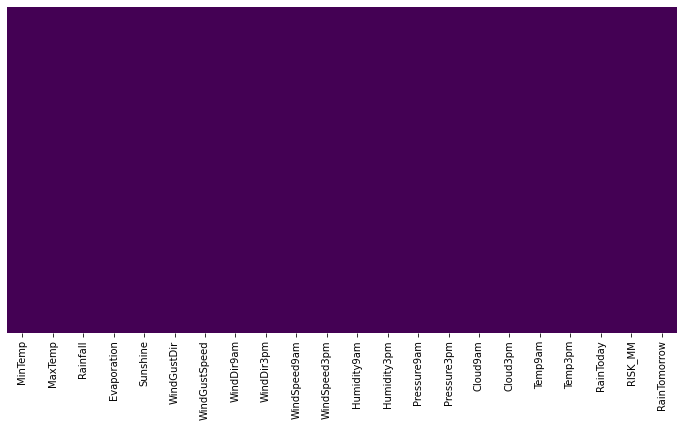

In [19]:
resizeplot()
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Clean!

* I know, I know I could create a function and pass the features as parameters but I prefer to do it with the 'nail'.According to instructions in the dataset, it is advisable to exclude the Risk_MM column so that it does not interfere with future forecasts.

In [20]:
df.drop('RISK_MM', inplace=True,axis=1)

In [21]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,68,29,1019.7,1015.0,7,7,14.4,23.6,No,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,62,56,1005.5,1007.0,2,7,13.5,14.1,Yes,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,68,49,1018.3,1018.5,7,7,11.1,15.4,Yes,No


* This is one of the parts that say a lot about our dataset. The correlation graph shows us the relationship between the features and how they can influence others.

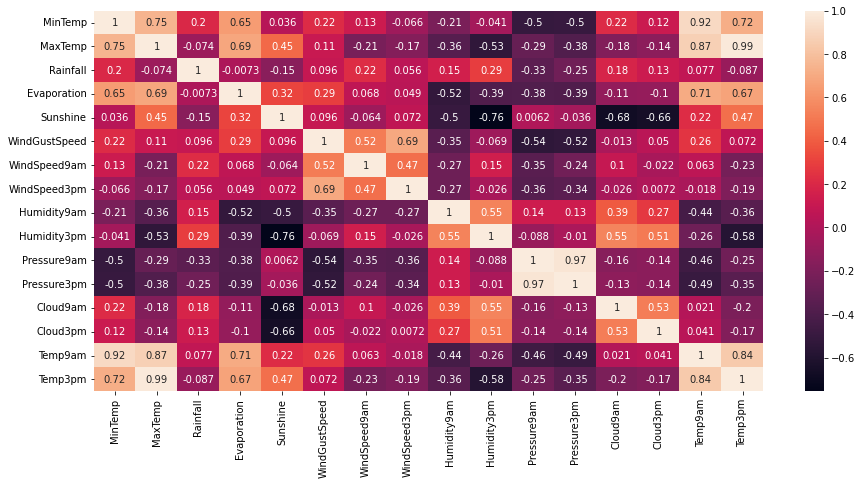

In [22]:
resizecorr()
sns.heatmap(df.corr(),annot=True)

* We see a good correlation between 'MinTemp' and 'Temp9am' which makes sense where the lowest temperatures are in the morning.

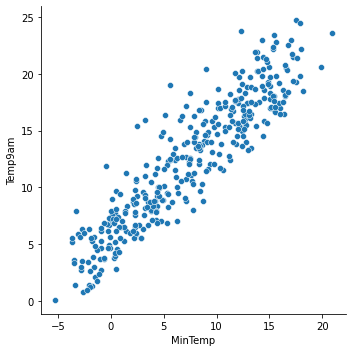

In [23]:
sns.relplot(x='MinTemp',y='Temp9am',data=df)

* I confess that I find a beauty a graph of the relationship between two features relating in an almost perfect way.
It is the same as the situation above but with the features 'MaxTemp' and 'Temp3pm' where they also make sense because the higher temperatures are after 12:00h.

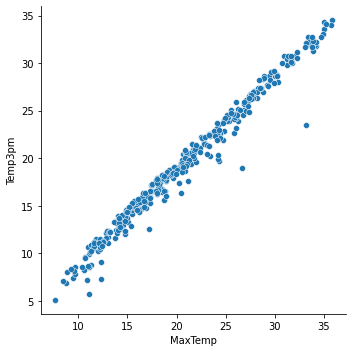

In [24]:
sns.relplot(x='MaxTemp',y='Temp3pm',data=df)

* The graph below shows the relationship between Sunshine and Temp3pm, which would lead us to believe that it would be a very high correlation apparently, but as we can see, we do not have this correlation. Some factors can contribute to this, such as the amount of clouds in the afternoon where we do not have a high rate of solar illumination.

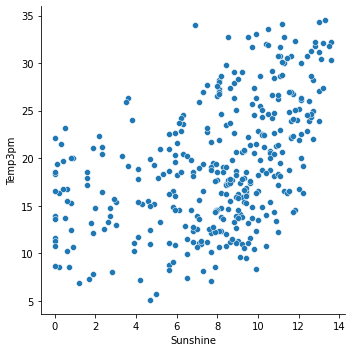

In [25]:
sns.relplot(x='Sunshine',y='Temp3pm',data=df)

* Below is a comparison of two features, the wind speed at two times, 9:00 am and 3:00 pm.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


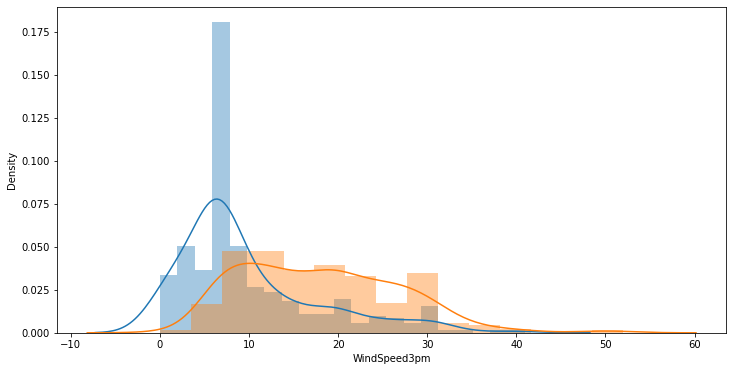

In [26]:
resizeplot()
sns.distplot(df['WindSpeed9am'])
sns.distplot(df['WindSpeed3pm'])

* Below, we have two features that are very complex to predict or to follow. The wind directions, in both plots, there are varied differences and amplitudes, which also brings us the idea that these two variables are influenced by factors such as the speed variation with the height, presence of obstacles in the surroundings, relief that can cause an effect of acceleration or deceleration in air flow, etc.

In [ ]:
fig, ax =plt.subplots(1,2,figsize= (15,6))
sns.countplot(df['WindDir9am'],ax=ax[0])
sns.countplot(df['WindDir3pm'],ax=ax[1])

* Well, technically the lower the relative humidity, the less water vapor in the air and the more “easily” the water will evaporate. In the extreme case, if the relative humidity is 100%, the same amount of water that evaporates from the water condenses in it, resulting in a net zero evaporation rate.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


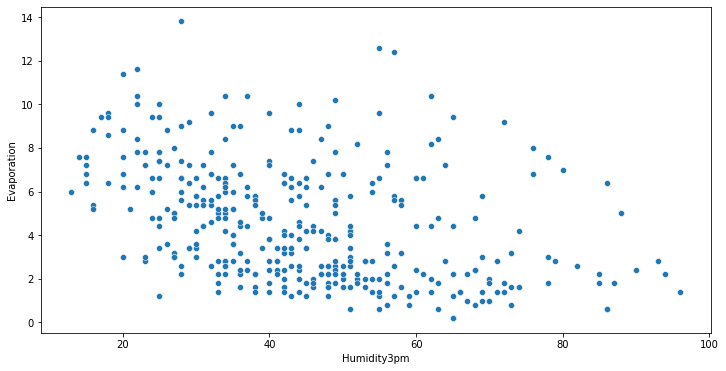

In [27]:
resizeplot()
sns.scatterplot(df['Humidity3pm'],df['Evaporation'])

* In this distribution graph we observed very similar data, which leads us to believe that the temperatures acting on the pressure did not vary much between the hours.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


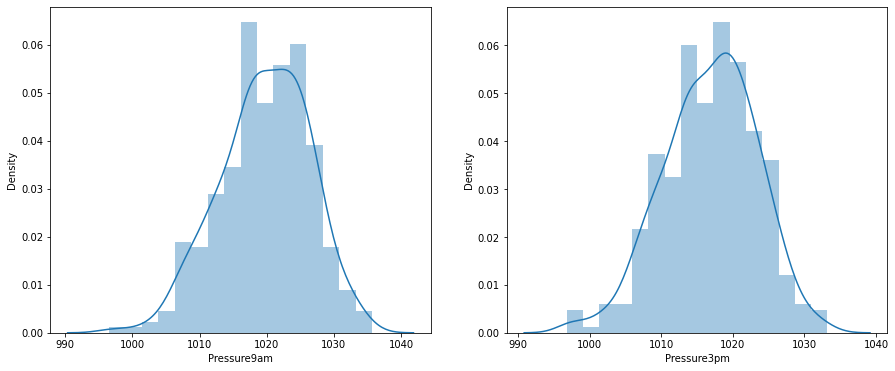

In [28]:
fig, ax =plt.subplots(1,2,figsize= (15,6))
sns.distplot(df['Pressure9am'],ax=ax[0])
sns.distplot(df['Pressure3pm'],ax=ax[1])

* This scatter plot shows that the relationship between pressure in the morning and afternoon is very similar, but we can see that in the afternoon (3pm) the dispersion is more dense in certain variations. That's explain the distplot above.

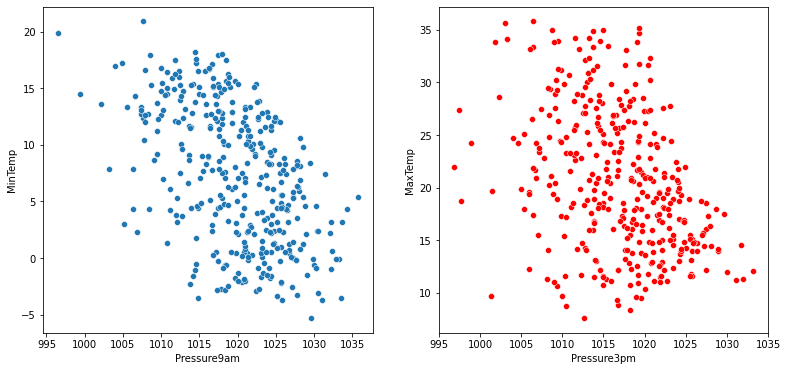

In [29]:
fig, ax =plt.subplots(1,2,figsize= (13,6))
sns.scatterplot(data=df,x='Pressure9am',y='MinTemp',ax=ax[0])
sns.scatterplot(data=df,x='Pressure3pm',y='MaxTemp',ax=ax[1],color='red')

* The graphs below are very similar, which leads us to consider that humidity and evaporation are similar at certain times, which leads to similar cloud formations.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


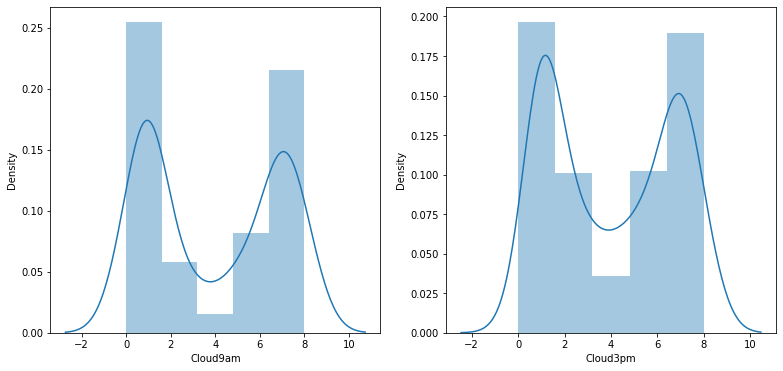

In [30]:
fig, ax =plt.subplots(1,2,figsize= (13,6))
sns.distplot(df['Cloud9am'],ax=ax[0])
sns.distplot(df['Cloud3pm'],ax=ax[1])

* Here we take a closer look at the relationship between evaporation and cloud formation. We obviously have a higher rate in the morning due to relatively higher humidity but in the afternoon we have more uniform rates according to the time.

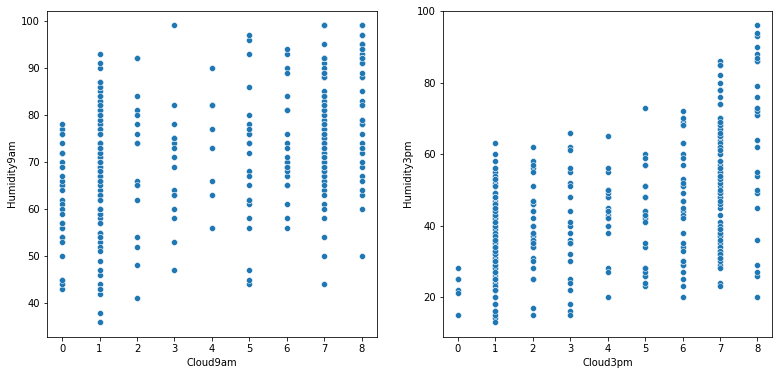

In [31]:
fig, ax =plt.subplots(1,2,figsize= (13,6))
sns.scatterplot(data=df, x='Cloud9am',y='Humidity9am',ax=ax[0])
sns.scatterplot(data=df,x='Cloud3pm',y='Humidity3pm',ax=ax[1])

* In this "groupby" we have important information about the possible conditions that may or may not cause rain conditions.

In [32]:
df[['Rainfall','Sunshine','Evaporation','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am',
    'Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am',
    'Temp3pm']].groupby(df['RainToday']).mean()

,Rainfall,Sunshine,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
RainToday,,,,,,,,,,,,,,
No,0.056667,8.179729,4.562667,38.682271,8.683036,17.640000,70.783333,41.996667,1020.812000,1017.658667,3.593333,3.906667,12.126333,19.456000
Yes,7.663636,6.680445,4.336364,45.106061,14.055330,19.560606,77.727273,55.984848,1014.695455,1012.954545,5.242424,4.560606,13.413636,18.207576


* We will use LabelBinarizer to handle categorical data.

In [33]:
from sklearn.preprocessing import LabelBinarizer

In [34]:
LB = LabelBinarizer()

In [35]:
df['WindGustDir'] = LB.fit_transform(df[['WindGustDir']])

In [36]:
df['WindDir9am'] = LB.fit_transform(df[['WindDir9am']])

In [37]:
df['WindDir3pm'] = LB.fit_transform(df[['WindDir3pm']])

* Here, we change the Labels of our main forecasts.

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
LE = LabelEncoder()

In [40]:
df['RainToday'] = LE.fit_transform(df['RainToday'])

In [41]:
df['RainTomorrow'] = LE.fit_transform(df['RainTomorrow'])

* Let's see how the data is doing.

In [42]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,0,30.0,0,0,6.0,...,68,29,1019.7,1015.0,7,7,14.4,23.6,0,1
1,14.0,26.9,3.6,4.4,9.7,0,39.0,1,0,4.0,...,80,36,1012.4,1008.4,5,3,17.5,25.7,1,1
2,13.7,23.4,3.6,5.8,3.3,0,85.0,0,0,6.0,...,82,69,1009.5,1007.2,8,7,15.4,20.2,1,1
3,13.3,15.5,39.8,7.2,9.1,0,54.0,0,0,30.0,...,62,56,1005.5,1007.0,2,7,13.5,14.1,1,1
4,7.6,16.1,2.8,5.6,10.6,0,50.0,0,0,20.0,...,68,49,1018.3,1018.5,7,7,11.1,15.4,1,0


* We separate the training and test variables.

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X = df.drop('RainTomorrow',axis=1).values
y = df['RainTomorrow'].values

* We will standardize our information, as they are on very different scales.

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
minmax = MinMaxScaler()

In [47]:
X = minmax.fit_transform(X)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

* Let's go to the predictor algorithms.

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
dtree = DecisionTreeClassifier()

In [51]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [52]:
previsor_dtree = dtree.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [54]:
print(classification_report(y_test,previsor_dtree))
print(confusion_matrix(y_test,previsor_dtree))
print('\n')
print('Acurácia:',np.round(accuracy_score(y_test,previsor_dtree),3)*100,'%')

              precision    recall  f1-score   support

           0       0.89      0.86      0.88       103
           1       0.33      0.39      0.36        18

    accuracy                           0.79       121
   macro avg       0.61      0.63      0.62       121
weighted avg       0.81      0.79      0.80       121

[[89 14]
 [11  7]]


Acurácia: 79.3 %


In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rfc = RandomForestClassifier(n_estimators=200)

In [57]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [58]:
previsor_rfc = rfc.predict(X_test)

In [59]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [60]:
print(classification_report(y_test,previsor_rfc))
print(confusion_matrix(y_test,previsor_rfc))
print('\n')
print('Acurácia:',np.round(accuracy_score(y_test,previsor_rfc),3)*100,'%')

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       103
           1       1.00      0.28      0.43        18

    accuracy                           0.89       121
   macro avg       0.94      0.64      0.69       121
weighted avg       0.90      0.89      0.87       121

[[103   0]
 [ 13   5]]


Acurácia: 89.3 %


In [61]:
from sklearn.svm import SVC

In [62]:
model = SVC()

In [63]:
model.fit(X_train, y_train)

SVC()

In [64]:
previsor_svc = model.predict(X_test)

In [65]:
from sklearn.metrics import classification_report,confusion_matrix

In [70]:
print(classification_report(y_test,previsor_svc))
print(confusion_matrix(y_test,previsor_svc))
print('\n')
print('Accuracy:',np.round(accuracy_score(y_test,previsor_svc),3)*100,'%')

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       103
           1       0.67      0.11      0.19        18

    accuracy                           0.86       121
   macro avg       0.77      0.55      0.56       121
weighted avg       0.83      0.86      0.81       121

[[102   1]
 [ 16   2]]


Accuracy: 86.0 %


In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
LR = LogisticRegression()

In [73]:
LR.fit(X_train,y_train)

LogisticRegression()

In [74]:
predict_LR = LR.predict(X_test)

In [75]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [76]:
print(classification_report(y_test,predict_LR))
print(confusion_matrix(y_test,predict_LR))
print('\n')
print('Accuracy:', np.round(accuracy_score(y_test,predict_LR),3)*100,'%')

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       103
           1       0.86      0.33      0.48        18

    accuracy                           0.89       121
   macro avg       0.88      0.66      0.71       121
weighted avg       0.89      0.89      0.87       121

[[102   1]
 [ 12   6]]


Acurácia: 89.3 %


In [77]:
Acuracia_LR = np.round(accuracy_score(y_test,predict_LR),3) *100
Acuracia_svc = np.round(accuracy_score(y_test,previsor_svc),3)*100
Acuracia_rfc = np.round(accuracy_score(y_test,previsor_rfc),3)*100
Acuracia_dtree = np.round(accuracy_score(y_test,previsor_dtree),3)*100


In [78]:
print('Accuracy_Decision_tree: ',Acuracia_dtree,'%')
print('Accuracy_Random_Forest: ', Acuracia_rfc,'%')
print('Accuracy_LR: ', Acuracia_LR,'%')
print('Accuracy_SVC: ', Acuracia_svc,'%')

Accuracy_Decision_tree:  79.3 %
Accuracy_Random_Forest:  89.3 %
Accuracy_LR:  89.3 %
Accuracy_SVC:  86.0 %


# We then had a better assessment of our Logistic Regression with an 89.3% chance of not raining with this information.
